In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df2015 = pd.read_csv('finishers-boston-marathon-2015-2016-2017/marathon_results_2015.csv')
df2016 = pd.read_csv('finishers-boston-marathon-2015-2016-2017/marathon_results_2016.csv')
df2017 = pd.read_csv('finishers-boston-marathon-2015-2016-2017/marathon_results_2017.csv')

In [3]:
# Summary statistics
# Oldest by Year
# Figure 1

print(df2015['Age'].max(), df2016['Age'].max(), df2017['Age'].max())

82 83 84


In [4]:
# Summary statistics
# 2017 Top Overall Man and Woman
# Figure 2

df2017[df2017['Gender'] == 1]

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
20,20,F3,"Kiplagat, Edna",37,F,Uasin Gishu,NaN,KEN,NaN,NaN,...,1:25:51,1:42:40,1:58:41,2:14:43,0:05:25,-,2:21:52,21,1,1


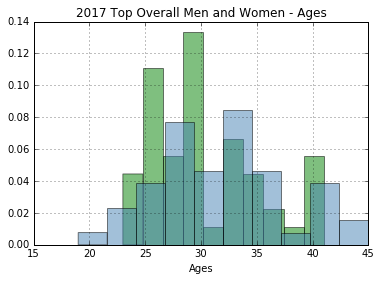

In [5]:
# Preliminary visualizations
# 2017 Top Overall Men and Women - Ages
# Figure 3

plt.hist(df2017['Age'][df2017['Gender'] <= 50][df2017['M/F'] == 'F'], normed=True, color='g', bins=10, alpha=.5)
plt.hist(df2017['Age'][df2017['Gender'] <= 50][df2017['M/F'] == 'M'], normed=True, color='steelblue', bins=10, alpha=.5)
plt.title('2017 Top Overall Men and Women - Ages')
plt.xlabel('Ages')
plt.grid(True)

plt.show()

In [6]:
# Looking at Top Country Participation

Country_counts = df2017['Country'].value_counts()
Country_counts.iloc[0:10]

USA    20945
CAN     1870
GBR      425
MEX      285
CHN      242
GER      226
BRA      205
AUS      191
JPN      170
ITA      165
Name: Country, dtype: int64

In [7]:
# Throwing in Kenya for fun...and removing USA...

Country_counts.loc['KEN']

8

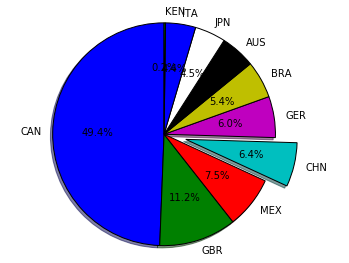

In [8]:
# Looking at Top Country Participation
# Figure 4

labels = 'CAN', 'GBR', 'MEX', 'CHN', 'GER', 'BRA', 'AUS', 'JPN', 'ITA', 'KEN'
sizes = [1870, 425, 285, 242, 226, 205, 191, 170, 165, 8]
explode = (0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.rcParams['patch.edgecolor'] = 'white'

plt.show()

In [9]:
# Converting time-duration columns to secs

def get_sec(time_str):
    h,m,s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [10]:
# Replacing dashes with '0:00:00'

d = {'-':'0:00:00'}
df2015 = df2015.replace(d)
df2016 = df2015.replace(d)
df2017 = df2015.replace(d)

In [11]:
# Converting time-duration columns to secs

df2015['5K_sec'] = [get_sec(i) for i in df2015['15K']]
df2015['10K_sec'] = [get_sec(i) for i in df2015['10K']]
df2015['15K_sec'] = [get_sec(i) for i in df2015['15K']]
df2015['20K_sec'] = [get_sec(i) for i in df2015['20K']]
df2015['Half_sec'] = [get_sec(i) for i in df2015['Half']]
df2015['25K_sec'] = [get_sec(i) for i in df2015['25K']]
df2015['30K_sec'] = [get_sec(i) for i in df2015['30K']]
df2015['35K_sec'] = [get_sec(i) for i in df2015['35K']]
df2015['40K_sec'] = [get_sec(i) for i in df2015['40K']]
df2015['Pace_sec'] = [get_sec(i) for i in df2015['Pace']]
df2015['Official_Time_sec'] = [get_sec(i) for i in df2015['Official Time']]

df2016['5K_sec'] = [get_sec(i) for i in df2016['15K']]
df2016['10K_sec'] = [get_sec(i) for i in df2016['10K']]
df2016['15K_sec'] = [get_sec(i) for i in df2016['15K']]
df2016['20K_sec'] = [get_sec(i) for i in df2016['20K']]
df2016['Half_sec'] = [get_sec(i) for i in df2016['Half']]
df2016['25K_sec'] = [get_sec(i) for i in df2016['25K']]
df2016['30K_sec'] = [get_sec(i) for i in df2016['30K']]
df2016['35K_sec'] = [get_sec(i) for i in df2016['35K']]
df2016['40K_sec'] = [get_sec(i) for i in df2016['40K']]
df2016['Pace_sec'] = [get_sec(i) for i in df2016['Pace']]
df2016['Official_Time_sec'] = [get_sec(i) for i in df2016['Official Time']]

df2017['5K_sec'] = [get_sec(i) for i in df2017['15K']]
df2017['10K_sec'] = [get_sec(i) for i in df2017['10K']]
df2017['15K_sec'] = [get_sec(i) for i in df2017['15K']]
df2017['20K_sec'] = [get_sec(i) for i in df2017['20K']]
df2017['Half_sec'] = [get_sec(i) for i in df2017['Half']]
df2017['25K_sec'] = [get_sec(i) for i in df2017['25K']]
df2017['30K_sec'] = [get_sec(i) for i in df2017['30K']]
df2017['35K_sec'] = [get_sec(i) for i in df2017['35K']]
df2017['40K_sec'] = [get_sec(i) for i in df2017['40K']]
df2017['Pace_sec'] = [get_sec(i) for i in df2017['Pace']]
df2017['Official_Time_sec'] = [get_sec(i) for i in df2017['Official Time']]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

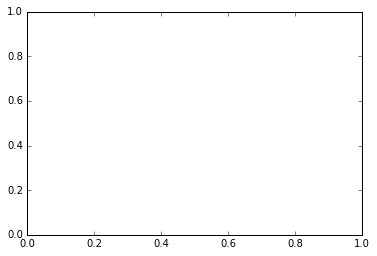

In [15]:
# 1
# Comparisson BAR CHART
# 2017 Race Paces by Person
# Visualizing the best individual runners' paces over the whole race

a = df2017['5K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'M']
b = df2017['10K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'M']
c = df2017['15K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'M']
d = df2017['20K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'M']
e = df2017['Half_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'M']
f = df2017['25K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'M']
g = df2017['30K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'M']
h = df2017['35K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'M']
i = df2017['40K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'M']

j = df2017['5K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'F']
k = df2017['10K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'F']
l = df2017['15K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'F']
m = df2017['20K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'F']
n = df2017['Half_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'F']
o = df2017['25K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'F']
p = df2017['30K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'F']
q = df2017['35K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'F']
r = df2017['40K_sec'][df2017['Gender'] == 1][df2017['M/F'] == 'F']

n_groups = 9
times_kiplagat = (a, b, c, d, e, f, g, h, i)
times_kirui = (j, k, l, m, n, o, p, q, r)
 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, times_kiplagat, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Kiplagat')
 
rects2 = plt.bar(index + bar_width, times_kirui, bar_width,
                 alpha=opacity,
                 color='steelblue',
                 label='Kirui')
 
plt.xlabel('Paces')
plt.ylabel('Time')
plt.title('2017 Race Paces by Person')
plt.xticks(index + bar_width, ('5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [20]:
# 2
# Bubble plotting by country performance (official time and pace)
# Bubble size by country count (aka participation)
# 2017

# x = Official Time
# y = Pace
# s = Country Count (w/ labels)

Countries = df2017['Country'].unique()
Countries.sort()

the_best = pd.DataFrame(index=Countries)
the_best['Country_count'] = list(df2017['Country'].value_counts())
the_best['Official_Time_sec_mean'] = df2017.groupby('Country')['Official_Time_sec'].mean()
the_best['Pace_sec_mean'] = df2017.groupby('Country')['Pace_sec'].mean()

a = the_best['Official_Time_sec']
b = the_best['Pace_sec_mean']
c = the_best['Country_Count']

plt.scatter(a, b, s=c*10, alpha=0.5)
plt.show()

KeyError: 'Official_Time_sec'

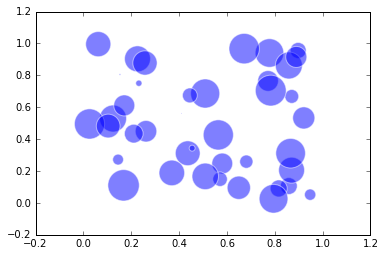

In [22]:
# Scatter example

x = np.random.rand(40)
y = np.random.rand(40)
z = np.random.rand(40)
 
# use the scatter function
plt.scatter(x, y, s=z*1000, alpha=0.5)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

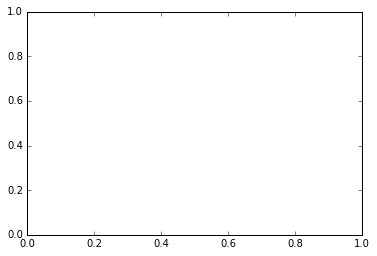

In [23]:
# 3
# Stacked BAR CHART (Genders w/ stacked average paces)
# Stacking the 2017 old and young by pace

# Still need to convert durations to secs

MT1 = df2017['Official_Time_sec'][df2017['Age'] > 50][df2017['Age'] <= 59][df2017['M/F'] == 'M']
MT2 = df2017['Official_Time_sec'][df2017['Age'] > 75][df2017['Age'] <= 79][df2017['M/F'] == 'M']
FT1 = df2017['Official_Time_sec'][df2017['Age'] > 50][df2017['Age'] <= 59][df2017['M/F'] == 'F']
FT2 = df2017['Official_Time_sec'][df2017['Age'] > 75][df2017['Age'] <= 79][df2017['M/F'] == 'F']

MT3 = df2017['Pace_sec'][df2017['Age'] > 50][df2017['Age'] <= 59][df2017['M/F'] == 'M']
MT4 = df2017['Pace_sec'][df2017['Age'] > 75][df2017['Age'] <= 79][df2017['M/F'] == 'M']
FT3 = df2017['Pace_sec'][df2017['Age'] > 50][df2017['Age'] <= 59][df2017['M/F'] == 'F']
FT4 = df2017['Pace_sec'][df2017['Age'] > 75][df2017['Age'] <= 79][df2017['M/F'] == 'F']

MT5 = df2017['25K_sec'][df2017['Age'] > 50][df2017['Age'] <= 59][df2017['M/F'] == 'M']
MT6 = df2017['25K_sec'][df2017['Age'] > 75][df2017['Age'] <= 79][df2017['M/F'] == 'M']
FT5 = df2017['25K_sec'][df2017['Age'] > 50][df2017['Age'] <= 59][df2017['M/F'] == 'F']
FT6 = df2017['25K_sec'][df2017['Age'] > 75][df2017['Age'] <= 79][df2017['M/F'] == 'F']

N = 6
Men_times = (MT1, MT2, MT3, MT4, MT5, MT6)
Women_times = (MT1, MT2, MT3, MT4, MT5, MT6)
ind = np.arange(N)
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Men_times, width, color='#d62728')
p2 = plt.bar(ind, Women_times, width, bottom=menMeans)

plt.ylabel('Total Times')
plt.title('2017 Combined Times of Age Divisions')
plt.xticks(ind, ('Men Official', 'Women Official', 'Men Pace', 'Women Pace', 'Men 25K', 'Women 25K'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('55 - 59', '75 - 79'))

plt.show()

In [ ]:
# Bayesian predictive scenario of a runner in 2019?
# Likelihood of winning given a pace and...a country? or gender?